In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Import

In [3]:
# df_Customers
df_Customers = pd.read_csv('/Users/yulun/Desktop/Ecommerce Order & Supply Chain/df_Customers.csv')
# df_OrderItems
df_OrderItems = pd.read_csv('/Users/yulun/Desktop/Ecommerce Order & Supply Chain/df_OrderItems.csv')
# df_Orders
df_Orders = pd.read_csv('/Users/yulun/Desktop/Ecommerce Order & Supply Chain/df_Orders.csv')
# df_Payments
df_Payments = pd.read_csv('/Users/yulun/Desktop/Ecommerce Order & Supply Chain/df_Payments.csv')
# df_Products
df_Products = pd.read_csv('/Users/yulun/Desktop/Ecommerce Order & Supply Chain/df_Products.csv')

## Data Preview

#### Dataset Features

##### Orders Table:
order_id: Unique identifier for an order, acting as the primary key.

customer_id: Unique identifier for a customer. This table may not be unique at this level.

order_status: Indicates the status of an order (e.g., delivered, cancelled, processing, etc.).

order_purchase_timestamp: Timestamp when the order was made by the customer.
order_approved_at: Timestamp when the order was approved from the seller's side.

order_delivered_timestamp: Timestamp when the order was delivered at the customer's location.

order_estimated_delivery_date: Estimated date of delivery shared with the customer while placing the order.

##### Order Items Table
order_id: Unique identifier for an order.

order_item_id: Item number in each order, acting as part of the primary key along with the order_id.

product_id: Unique identifier for a product.

seller_id: Unique identifier for the seller.

price: Selling price of the product.

shipping_charges: Charges associated with the shipping of the product.

##### Customers Table
customer_id: Unique identifier for a customer, acting as the primary key.

customer_zip_code_prefix: Customer's Zip code.

customer_city: Customer's city.

customer_state: Customer's state.

##### Payments Table
order_id: Unique identifier for an order.

payment_sequential: Provides information about the sequence of payments for the given order.

payment_type: Type of payment (e.g., credit_card, debit_card, etc.).

payment_installments: Payment installment number in case of credit cards.

payment_value: Transaction value.

##### Products Table
product_id: Unique identifier for each product, acting as the primary key.

product_category_name: Name of the category the product belongs to.

product_weight_g: Product weight in grams.

product_length_cm: Product length in centimeters.

product_height_cm: Product height in centimeters.

product_width_cm: Product width in centimeters.

### Check data

In [4]:
datasets = [df_Orders, df_OrderItems, df_Customers, df_Payments, df_Products]
names = ['df_Orders', 'df_OrderItems', 'df_Customers', 'df_Payments', 'df_Products']
j = 0

for i in datasets:
    print(names[j])
    print(i.head())
    print(i.dtypes)
    print(i.isna().sum())
    print(i.shape)
    j += 1

df_Orders
       order_id   customer_id order_status order_purchase_timestamp  \
0  Axfy13Hk4PIk  hCT0x9JiGXBQ    delivered      2017-10-22 18:57:54   
1  v6px92oS8cLG  PxA7fv9spyhx    delivered      2018-06-20 21:40:31   
2  Ulpf9skrhjfm  g3nXeJkGI0Qw    delivered      2018-02-16 16:19:31   
3  bwJVWupf2keN  EOEsCQ6QlpIg    delivered      2018-08-18 18:04:29   
4  Dd0QnrMk9Cj5  mVz5LO2Vd6cL    delivered      2017-12-22 16:44:04   

     order_approved_at order_delivered_timestamp order_estimated_delivery_date  
0  2017-10-22 19:14:13       2017-10-26 22:19:52                    2017-11-09  
1  2018-06-20 22:20:20       2018-07-03 22:51:22                    2018-07-24  
2  2018-02-17 16:15:35       2018-02-27 01:29:50                    2018-03-08  
3  2018-08-18 18:15:16       2018-08-27 20:03:51                    2018-09-19  
4  2017-12-22 17:31:31       2018-01-05 19:22:49                    2018-01-18  
order_id                         object
customer_id                      obje

#### Merge Data

In [5]:
df_Products.dropna(inplace=True)
df = df_Orders.merge(df_OrderItems, on='order_id', how='left')
df = df.merge(df_Payments, on='order_id', how='left')
df = df.merge(df_Customers, on='customer_id', how='left')
df = df.merge(df_Products, on='product_id', how='left')
df.head()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,product_id,seller_id,price,...,payment_installments,payment_value,customer_zip_code_prefix,customer_city,customer_state,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,Axfy13Hk4PIk,hCT0x9JiGXBQ,delivered,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09,90K0C1fIyQUf,ZWM05J9LcBSF,223.51,...,1,259.14,58125,varzea paulista,SP,toys,491.0,19.0,12.0,16.0
1,Axfy13Hk4PIk,hCT0x9JiGXBQ,delivered,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09,90K0C1fIyQUf,ZWM05J9LcBSF,223.51,...,1,259.14,58125,varzea paulista,SP,toys,491.0,19.0,12.0,16.0
2,Axfy13Hk4PIk,hCT0x9JiGXBQ,delivered,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09,90K0C1fIyQUf,ZWM05J9LcBSF,223.51,...,1,259.14,58125,varzea paulista,SP,toys,491.0,19.0,12.0,16.0
3,Axfy13Hk4PIk,hCT0x9JiGXBQ,delivered,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09,90K0C1fIyQUf,ZWM05J9LcBSF,223.51,...,1,259.14,58125,varzea paulista,SP,toys,491.0,19.0,12.0,16.0
4,Axfy13Hk4PIk,hCT0x9JiGXBQ,delivered,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09,90K0C1fIyQUf,ZWM05J9LcBSF,223.51,...,1,259.14,58125,varzea paulista,SP,toys,491.0,19.0,12.0,16.0


In [6]:
df.isna().sum()

order_id                             0
customer_id                          0
order_status                         0
order_purchase_timestamp             0
order_approved_at                  199
order_delivered_timestamp        35964
order_estimated_delivery_date        0
product_id                           0
seller_id                            0
price                                0
shipping_charges                     0
payment_sequential                   0
payment_type                         0
payment_installments                 0
payment_value                        0
customer_zip_code_prefix             0
customer_city                        0
customer_state                       0
product_category_name              323
product_weight_g                   323
product_length_cm                  323
product_height_cm                  323
product_width_cm                   323
dtype: int64

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.dtypes

order_id                          object
customer_id                       object
order_status                      object
order_purchase_timestamp          object
order_approved_at                 object
order_delivered_timestamp         object
order_estimated_delivery_date     object
product_id                        object
seller_id                         object
price                            float64
shipping_charges                 float64
payment_sequential                 int64
payment_type                      object
payment_installments               int64
payment_value                    float64
customer_zip_code_prefix           int64
customer_city                     object
customer_state                    object
product_category_name             object
product_weight_g                 float64
product_length_cm                float64
product_height_cm                float64
product_width_cm                 float64
dtype: object

In [9]:
# To datetime format
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['order_delivered_timestamp'] = pd.to_datetime(df['order_delivered_timestamp'])
df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date'])
df['order_approved_at'] = pd.to_datetime(df['order_approved_at'])

## Exploratory Data Analysis

### Late deliveries

In [10]:
df['late_delivery'] = df['order_delivered_timestamp'] > df['order_estimated_delivery_date']


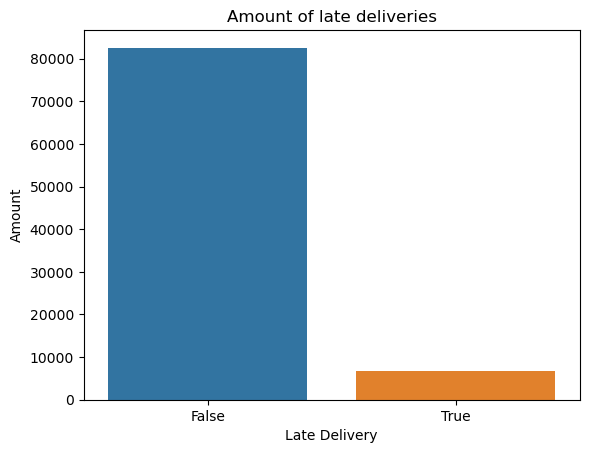

In [11]:
late_delivery = df['late_delivery'].value_counts().reset_index()
late_delivery.columns = ['Late_delivery', 'Amount']

sns.barplot(late_delivery, x='Late_delivery', y='Amount')
plt.title('Amount of late deliveries')
plt.xlabel('Late Delivery')
plt.ylabel('Amount')
plt.show()


    Estimated_delivery_time_in_days  Count
0                                21   5397
1                                22   5058
2                                23   4877
3                                24   4717
4                                20   4393
..                              ...    ...
91                               94      1
92                               97      1
93                               99      1
94                               87      1
95                               90      1

[96 rows x 2 columns]


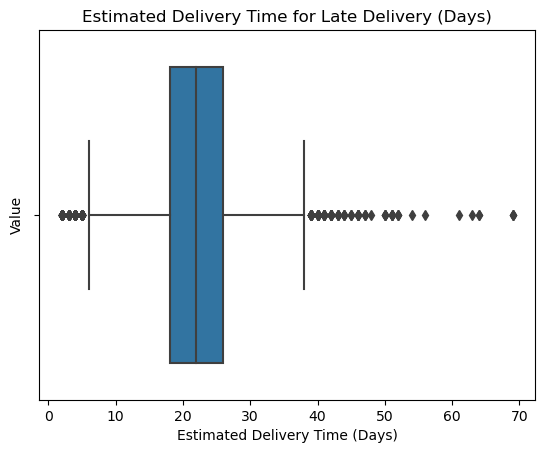

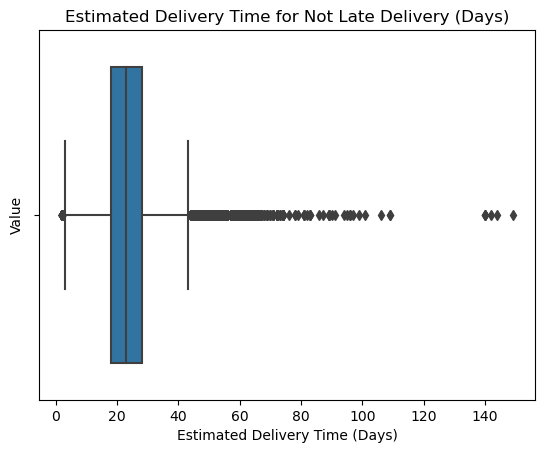

In [12]:
# Current estimated delivery time
df['estimated_delivery_time'] = df['order_estimated_delivery_date'] - df['order_purchase_timestamp']
df['estimated_delivery_time_in_days'] = df['estimated_delivery_time'].dt.days
estimated_delivery_time = df['estimated_delivery_time_in_days'].value_counts().reset_index()
estimated_delivery_time.columns = ['Estimated_delivery_time_in_days', 'Count']
print(estimated_delivery_time)

# Subset for late_delivery
df['late_delivery'] = df['late_delivery'].replace({True:'Yes', False:'No'})

# Plot for late delivery
sns.boxplot(data=df[df['late_delivery'] == 'Yes'], x='estimated_delivery_time_in_days')
plt.xlabel('Estimated Delivery Time (Days)')
plt.ylabel('Value')
plt.title('Estimated Delivery Time for Late Delivery (Days)')

# Show the plot
plt.show()

# Plot for not late delivery
sns.boxplot(data=df[df['late_delivery'] == 'No'], x='estimated_delivery_time_in_days')
plt.xlabel('Estimated Delivery Time (Days)')
plt.ylabel('Value')
plt.title('Estimated Delivery Time for Not Late Delivery (Days)')

# Show the plot
plt.show()

There is not much difference between between late delivery and on-time delivery.

In [13]:
df.groupby('late_delivery')['estimated_delivery_time_in_days'].agg(['mean', 'sum'])

,mean,sum
late_delivery,,
No,23.688210,1956125
Yes,21.586969,145453


### Are late deliveries due to product size or weight?

#### 1. Product Size

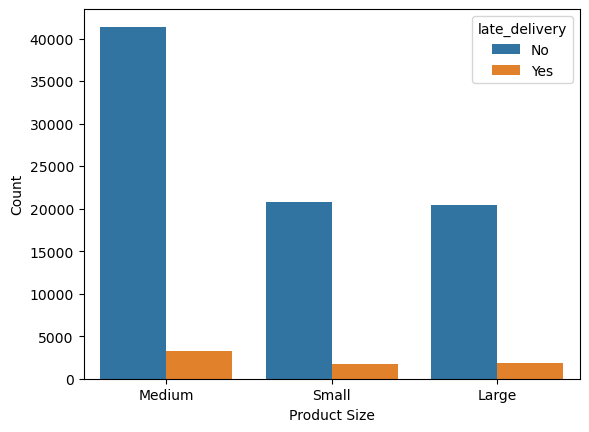

In [14]:
df['product_volume'] = df['product_length_cm'] * df['product_height_cm'] * df['product_width_cm']

# Classifying product size
q25 = df['product_volume'].quantile([0.25]).values[0]
q75 = df['product_volume'].quantile([0.75]).values[0]

def check_size(x):
    if x >=q75:
        return 'Large'
    elif x>=q25:
        return 'Medium'
    else:
        return 'Small'
    
df['product_size'] = df['product_volume'].apply(lambda x : check_size(x))

sns.countplot(df, x='product_size', hue='late_delivery')
plt.xlabel('Product Size')
plt.ylabel('Count')
plt.show()

In [15]:
import scipy.stats as stats

# Create a contingency table
contingency_table = pd.crosstab(df['product_size'], df['late_delivery'])

# Perform the Chi-Square test
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print("Chi-Square Statistic:", chi2)
print("P-Value:", p_value)


Chi-Square Statistic: 12.810563312850233
P-Value: 0.0016528046330921236


Since p-value is less than 0.05, there is a significant association between product size and late delivery

#### 2. Product Weight

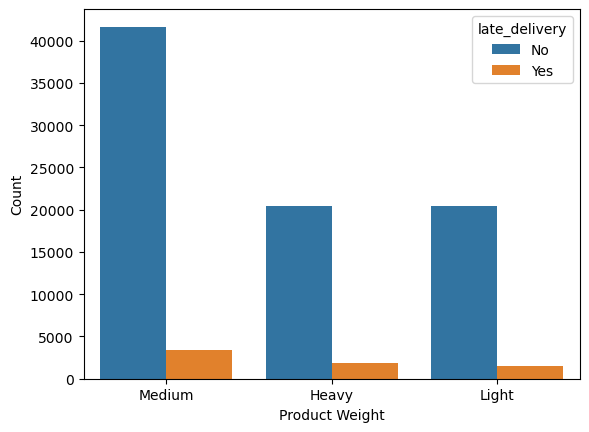

In [16]:
q25 = df['product_weight_g'].quantile([0.25]).values[0]
q75 = df['product_weight_g'].quantile([0.75]).values[0]

def check_weight(x):
    if x >= q75:
        return 'Heavy'
    elif x >= q25:
        return 'Medium'
    else:
        return 'Light'
    
df['product_weight'] = df['product_weight_g'].apply(lambda x : check_weight(x))

sns.countplot(df, x='product_weight', hue='late_delivery')
plt.xlabel('Product Weight')
plt.ylabel('Count')
plt.show()

In [17]:
# Create a contingency table
contingency_table = pd.crosstab(df['product_weight'], df['late_delivery'])

# Perform the Chi-Square test
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print("Chi-Square Statistic:", chi2)
print("P-Value:", p_value)

Chi-Square Statistic: 30.126328725645838
P-Value: 2.8717778219130394e-07


Since p-value is less than 0.05, there is a significant association between product weight and late delivery

### Late Delivery based on order day of week 

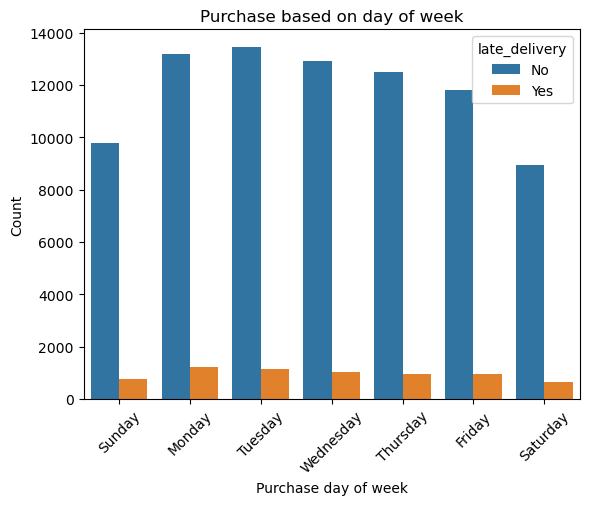

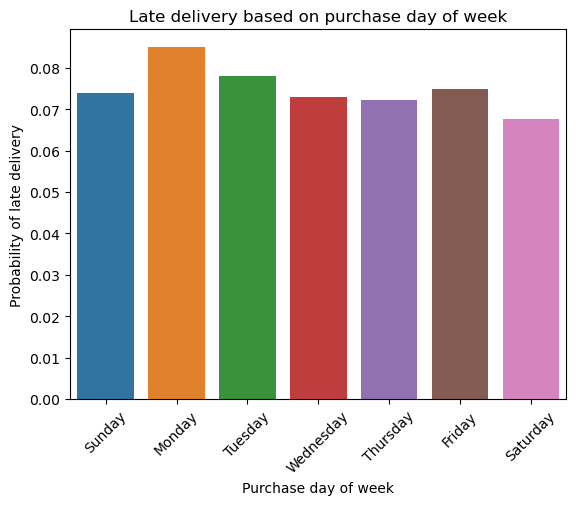

In [50]:
df['purchase_dow'] = df['order_purchase_timestamp'].dt.day_of_week
df['purchase_dow_name'] = df['purchase_dow'].map({
    0: 'Monday', 
    1: 'Tuesday', 
    2: 'Wednesday', 
    3: 'Thursday', 
    4: 'Friday', 
    5: 'Saturday', 
    6: 'Sunday'
})


days_order = [ 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
df['purchase_dow_name'] = pd.Categorical(df['purchase_dow_name'], categories=days_order, ordered=True)

sns.countplot(df, x='purchase_dow_name', hue='late_delivery')
plt.title('Purchase based on day of week')
plt.ylabel('Count')
plt.xlabel('Purchase day of week')
plt.xticks(rotation=45)
plt.show()

df6 = df.groupby('purchase_dow_name').size().reset_index(name='sum')
df7 = df[df['late_delivery'] == 'Yes'].groupby('purchase_dow_name').size().reset_index(name='late_delivery')
df8 = df6.merge(df7, on='purchase_dow_name', how='inner')
df8['late_delivery_probability'] = df8['late_delivery']/df8['sum']
df8

sns.barplot(df8, x='purchase_dow_name', y='late_delivery_probability')
plt.title('Late delivery based on purchase day of week')
plt.ylabel('Probability of late delivery')
plt.xlabel('Purchase day of week')
plt.xticks(rotation=45)
plt.show()

### Late deliveries based on approval day of week

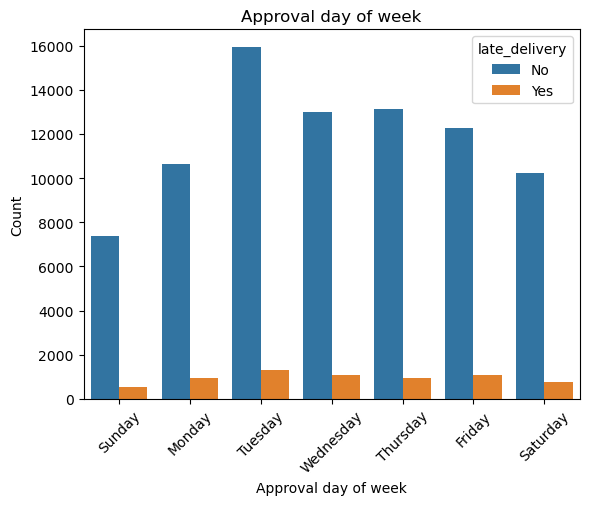

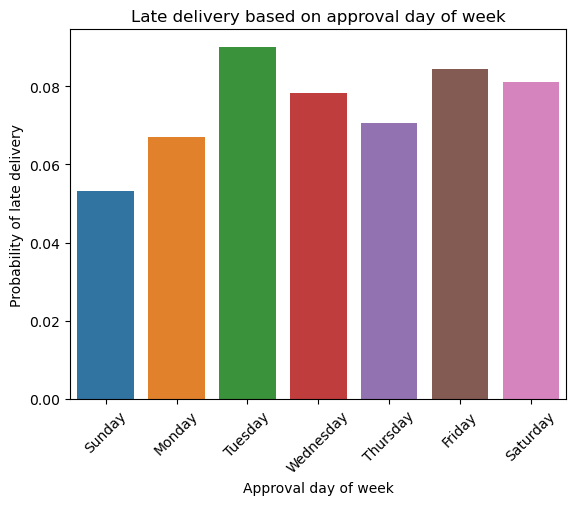

In [51]:
df['approval_dow'] = df['order_approved_at'].dt.day_of_week
df['approval_dow_name'] = df['approval_dow'].map({
    0: 'Monday', 
    1: 'Tuesday', 
    2: 'Wednesday', 
    3: 'Thursday', 
    4: 'Friday', 
    5: 'Saturday', 
    6: 'Sunday'
})


days_order = [ 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
df['approval_dow_name'] = pd.Categorical(df['approval_dow_name'], categories=days_order, ordered=True)

sns.countplot(df, x='approval_dow_name', hue='late_delivery')
plt.title('Approval day of week')
plt.ylabel('Count')
plt.xlabel('Approval day of week')
plt.xticks(rotation=45)
plt.show()

df9 = df.groupby('approval_dow_name').size().reset_index(name='sum')
df10 = df[df['late_delivery'] == 'Yes'].groupby('approval_dow_name').size().reset_index(name='late_delivery')
df11 = df9.merge(df10, on='approval_dow_name', how='inner')
df11['late_delivery_probability'] = df11['late_delivery']/df8['sum']
df11

sns.barplot(df11, x='approval_dow_name', y='late_delivery_probability')
plt.title('Late delivery based on approval day of week')
plt.ylabel('Probability of late delivery')
plt.xlabel('Approval day of week')
plt.xticks(rotation=45)
plt.show()

### Location-based late delivery

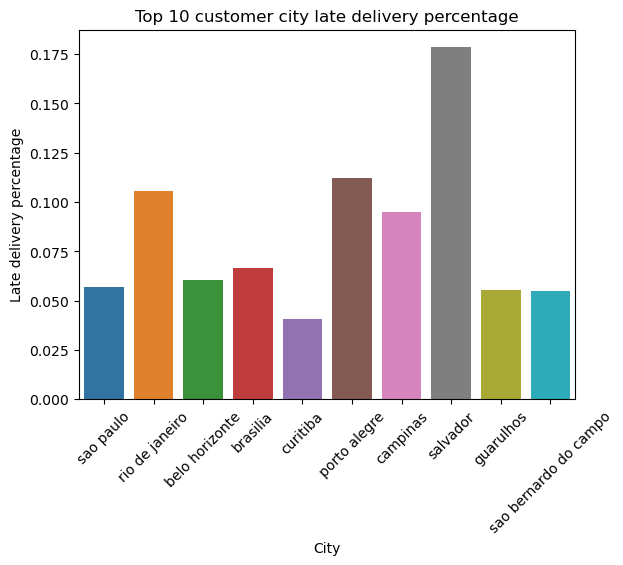

In [18]:
df1 = df[df['late_delivery'] == 'Yes'].groupby('customer_city')['late_delivery'].count().reset_index(name='late_delivery')
df2 = df.groupby('customer_city').size().reset_index(name='sum')
df3 = df1.merge(df2, on='customer_city', how='inner')
df3['late_delivery_percentage'] = df3['late_delivery'] / df3['sum']

# Filter data to only see top 10 customer city
df4 = df3.sort_values(by='sum', ascending=False).head(10)

sns.barplot(df4, x='customer_city', y='late_delivery_percentage')
plt.title('Top 10 customer city late delivery percentage')
plt.ylabel('Late delivery percentage')
plt.xlabel('City')
plt.xticks(rotation=45)
plt.show()

### Does order time affect order approval time?

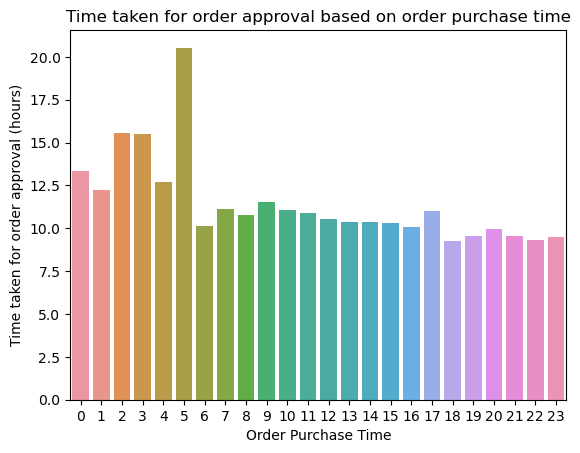

In [30]:
# Average time from order purchase to approval
df['Time_taken_order_approval'] = df['order_approved_at'] - df['order_purchase_timestamp']
df['Time_taken_order_approval_hr'] = df['Time_taken_order_approval'].dt.total_seconds() / 3600

df['order_purchase_timestamp_hour'] = df['order_purchase_timestamp'].dt.hour
df5= df.groupby('order_purchase_timestamp_hour')['Time_taken_order_approval_hr'].mean().reset_index(name='Time_taken_for_approval')

sns.barplot(df5, x='order_purchase_timestamp_hour', y='Time_taken_for_approval')
plt.xlabel('Order Purchase Time')
plt.ylabel('Time taken for order approval (hours)')
plt.title('Time taken for order approval based on order purchase time')
plt.show()